# Single Compounds Analysis
In this notebook we are going to analyse the features extracted with the measurements performed with single compounds.
Three compounds were tested:
- Acetone
- Isopropanol
- Toluene


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

## Load Features

In [20]:
features = pd.read_csv(r"C:\Users\resca\OneDrive - Politecnico di Milano\_Dottorato\4 - Code\temperature-enose-data-analysis\mos-v2\Outputs\Features\TEST_R_NORM_ZSCORE\single_compounds_features.csv", index_col=0)
features.head()

,Compound,Concentration,DeltaH,DeltaT1,DeltaT2,DeltaT3,SlopeH,SlopeL,AreaS,AreaT,DeltaR,Temperature Modulation,Sensor,Repetition
0,ACE,173,0.004992,2.183481,-0.391354,0.401877,-0.000249,0.067475,-1.066208,51.286929,0.611351,Sq+Tr,S-1,0.0
1,ACE,173,2.074111,2.062174,-0.405937,0.417093,0.001092,0.010912,715.722382,53.347521,0.611351,Sq+Tr,S-1,1.0
2,ACE,173,2.154155,2.141730,-0.421552,0.433295,0.001116,0.011363,740.955345,55.475295,0.611351,Sq+Tr,S-1,2.0
3,ACE,173,2.258143,2.245323,-0.436553,0.448781,0.001147,0.011673,768.999649,57.280474,0.611351,Sq+Tr,S-1,3.0
4,ACE,173,2.343742,2.330614,-0.449194,0.461784,0.001177,0.012618,795.340695,58.814843,0.611351,Sq+Tr,S-1,4.0


## Process Features
Remove sensors S-7 and S-8

In [21]:
features = features[~features["Sensor"].isin(["S-1", "S-6", "S-7","S-8"])]

Remove Repetition 0 and 11

In [22]:
features = features[features["Repetition"]>0]
features = features[features["Repetition"]<6]

unique_features = ["DeltaH",
    "DeltaT1",
    "DeltaT2",
    "DeltaT3",
    "SlopeH",
    "SlopeL",
    "AreaS",
    "AreaT",]
features[unique_features] = features[unique_features].apply(scipy.stats.zscore)

## Visualize Features
We now want to visualize the features for each:
- compound
- sensor
- concentration

In [23]:
unique_compounds = features["Compound"].unique()
unique_conc = features["Concentration"].unique()
unique_sensors = features["Sensor"].unique()
unique_features = ["DeltaH",
    "DeltaT1",
    "DeltaT2",
    "DeltaT3",
    "SlopeH",
    "SlopeL",
    "AreaS",
    "AreaT",]

In [24]:
def plot_feature_values_SEPARATE_REPS(feature):
    fig, ax = plt.subplots(nrows=len(unique_sensors), ncols=len(unique_compounds), sharex=True, sharey="row", figsize=(14,7))
    fig.suptitle(feature, fontsize=24, fontweight="bold")
    for idx, sensor in enumerate(unique_sensors):
        for compound_idx, compound in enumerate(unique_compounds):
            curr_ax = ax[idx][compound_idx]
            sensor_conc = sorted(features.loc[(features["Sensor"]==sensor) & (features["Compound"]==compound), "Concentration"].unique())
            for conc_idx, conc in enumerate(sensor_conc):
                curr_ax.bar(x=[i*4+conc_idx for i in range(int(features["Repetition"].max()))], 
                            height=features.loc[(features["Sensor"]==sensor) 
                                                & (features["Compound"]==compound)
                                                & (features["Concentration"]==conc) , feature])
            if idx == 0:
                curr_ax.set_title(compound, fontweight="bold")
            elif idx == len(unique_sensors) - 1:
                #curr_ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44], [0,1,2,3,4,5,6,7,8,9,10,11])
                curr_ax.set_xticks([0,4,8,12,16], [0,1,2,3,4])
                curr_ax.set_xlabel("Repetition", fontweight="bold")
            if compound_idx == 0:
                curr_ax.set_ylabel(sensor, fontweight="bold")
        

In [25]:
def plot_feature_values(feature):
    # Filter to include only the sensor "S-4"
    selected_sensor = "S-4"
    filtered_sensors = [selected_sensor] if selected_sensor in unique_sensors else []
    
    if not filtered_sensors:
        print(f"Sensor '{selected_sensor}' is not found in the dataset.")
        return
    
    fig, ax = plt.subplots(nrows=1, ncols=len(unique_compounds), sharex=True, sharey=True, figsize=(14, 4))
    fig.suptitle(feature, fontsize=24, fontweight="bold")
    
    # Custom color palette for L, M, H
    custom_palette = {"L": "green", "M": "orange", "H": "red"}
    
    # Iterate through compounds for the selected sensor
    for compound_idx, compound in enumerate(unique_compounds):
        curr_ax = ax[compound_idx]
        
        # Filter data for the selected sensor and current compound
        sensor_compound_data = features[(features["Sensor"] == selected_sensor) & (features["Compound"] == compound)]
        sensor_compound_data = sensor_compound_data.copy()  # Avoid SettingWithCopyWarning
        
        # Map concentrations to L, M, H
        sensor_conc = sorted(sensor_compound_data["Concentration"].unique())
        if len(sensor_conc) == 3:
            conc_labels = ["L", "M", "H"]
        else:
            conc_labels = [str(c) for c in sensor_conc]
        
        sensor_compound_data["Conc_Label"] = sensor_compound_data["Concentration"].map(
            dict(zip(sensor_conc, conc_labels))
        )
        
        # Create boxplot
        sns.boxplot(
            data=sensor_compound_data,
            x="Conc_Label",
            y=feature,
            ax=curr_ax,
            order=["L", "M", "H"],  # Ensure consistent order
            palette=custom_palette  # Custom colors
        )
        
        # Set title and labels
        curr_ax.set_title(compound, fontweight="bold")
        curr_ax.set_xlabel("Concentration", fontweight="bold")
        if compound_idx == 0:
            curr_ax.set_ylabel(selected_sensor, fontweight="bold")
    
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [26]:
def generate_boxplot_data_latex(feature):
    # Custom color palette for L, M, H
    color_mapping = {"L": "green", "M": "orange", "H": "red"}

    # Filter to include only the sensor "S-4"
    selected_sensor = "S-4"
    if selected_sensor not in features["Sensor"].unique():
        print(f"Sensor '{selected_sensor}' is not found in the dataset.")
        return

    # Prepare the output data structure for LaTeX
    latex_data = []

    # Iterate over compounds to create separate figures
    for compound in unique_compounds:
        # Filter data for the selected sensor and current compound
        sensor_compound_data = features[(features["Sensor"] == selected_sensor) & (features["Compound"] == compound)]
        sensor_compound_data = sensor_compound_data.copy()  # Avoid SettingWithCopyWarning
        
        # Map concentrations to L, M, H
        sensor_conc = sorted(sensor_compound_data["Concentration"].unique())
        if len(sensor_conc) == 3:
            conc_labels = ["L", "M", "H"]
        else:
            conc_labels = [str(c) for c in sensor_conc]
        
        sensor_compound_data["Conc_Label"] = sensor_compound_data["Concentration"].map(
            dict(zip(sensor_conc, conc_labels))
        )
        
        # Generate statistics for each concentration range
        for label in conc_labels:
            data = sensor_compound_data[sensor_compound_data["Conc_Label"] == label][feature]
            if not data.empty:
                lower_whisker = data.min()
                upper_whisker = data.max()
                lower_quartile = np.percentile(data, 25)
                upper_quartile = np.percentile(data, 75)
                median = data.median()
                
                # Append to LaTeX data
                latex_data.append({
                    "Compound": compound,
                    "Conc_Label": label,
                    f"{feature}_LW": lower_whisker,
                    f"{feature}_UW": upper_whisker,
                    f"{feature}_LQ": lower_quartile,
                    f"{feature}_UQ": upper_quartile,
                    f"{feature}_M": median
                })

    # Convert to DataFrame and save as CSV
    latex_df = pd.DataFrame(latex_data)
    output_filename = f"latex_boxplot_data_{feature}.csv"
    latex_df.to_csv(output_filename, index=False)
    print(f"Data saved to {output_filename}")

In [27]:
def plot_feature_values_fixed_sensor(sensor):
    fig, ax = plt.subplots(nrows=len(unique_features), ncols=len(unique_compounds), sharex=True, sharey="row", figsize=(18,12))
    fig.suptitle(sensor, fontsize=24, fontweight="bold")
    for idx, feature in enumerate(unique_features):
        for compound_idx, compound in enumerate(unique_compounds):
            curr_ax = ax[idx][compound_idx]
            sensor_conc = sorted(features.loc[(features["Sensor"]==sensor) & (features["Compound"]==compound), "Concentration"].unique())
            for conc_idx, conc in enumerate(sensor_conc):
                curr_ax.bar(x=[i*4+conc_idx for i in range(int(features["Repetition"].max()))], 
                            height=features.loc[(features["Sensor"]==sensor) 
                                                & (features["Compound"]==compound)
                                                & (features["Concentration"]==conc) , feature])
            if idx == 0:
                curr_ax.set_title(compound, fontweight="bold")
            elif idx == len(unique_sensors) - 1:
                #curr_ax.set_xticks([0,4,8,12,16,20,24,28,32,36,40,44], [0,1,2,3,4,5,6,7,8,9,10,11])ù
                curr_ax.set_xticks([0,4,8,12,16], [0,1,2,3,4])
                curr_ax.set_xlabel("Repetition", fontweight="bold")
            if compound_idx == 0:
                curr_ax.set_ylabel(feature, fontweight="bold")
        

### DeltaH

In [28]:
#plot_feature_values("DeltaH")

### DeltaL

In [29]:
#plot_feature_values("DeltaT1")

In [30]:
#plot_feature_values("DeltaT2")

In [31]:
#plot_feature_values("DeltaT3")

### SlopeH

In [32]:
#plot_feature_values("SlopeH")

### SlopeL

In [33]:
#plot_feature_values("SlopeL")

### AreaS

In [34]:
#plot_feature_values("AreaS")

### AreaT

In [35]:
#plot_feature_values("AreaT")

In [36]:
generate_boxplot_data_latex("AreaT")

Data saved to latex_boxplot_data_AreaT.csv


### DeltaR

In [37]:
#plot_feature_values("DeltaR")

In [38]:
corr_matrix = features.loc[:,["DeltaH","DeltaT1","DeltaT2","DeltaT3","SlopeH","SlopeL","AreaS","AreaT"]].corr()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,DeltaH,DeltaT1,DeltaT2,DeltaT3,SlopeH,SlopeL,AreaS,AreaT
DeltaH,nan,nan,nan,nan,nan,nan,nan,nan
DeltaT1,0.99,nan,nan,nan,nan,nan,nan,nan
DeltaT2,-0.54,-0.55,nan,nan,nan,nan,nan,nan
DeltaT3,0.83,0.76,-0.76,nan,nan,nan,nan,nan
SlopeH,0.20,0.35,-0.41,-0.07,nan,nan,nan,nan
SlopeL,0.81,0.77,-0.86,0.98,0.08,nan,nan,nan
AreaS,0.97,0.99,-0.62,0.76,0.44,0.78,nan,nan
AreaT,0.82,0.72,-0.47,0.93,-0.34,0.85,0.67,nan


C:\Users\resca\AppData\Local\Temp\ipykernel_53968\2190551768.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(features.loc[:,["DeltaH","DeltaT1","DeltaT2","DeltaT3","SlopeH","SlopeL","AreaS","AreaT"]], ax=ax);


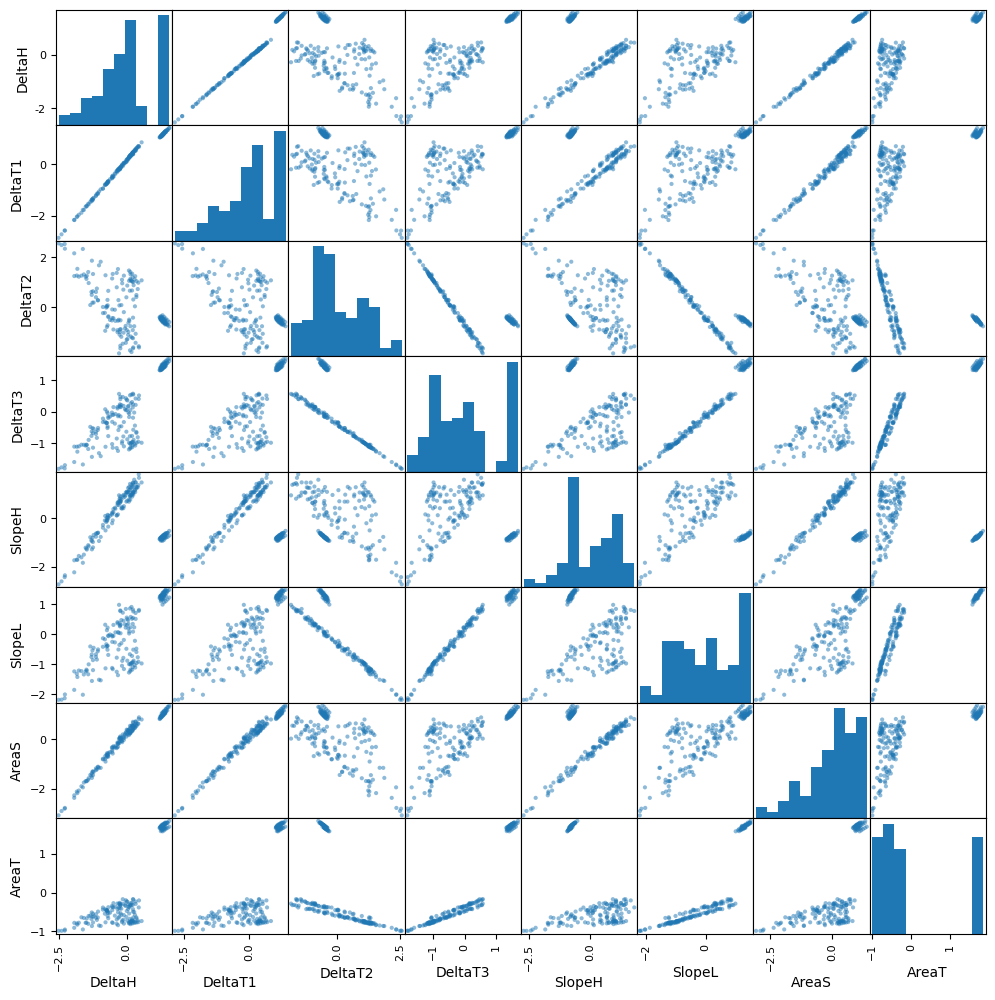

In [39]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
pd.plotting.scatter_matrix(features.loc[:,["DeltaH","DeltaT1","DeltaT2","DeltaT3","SlopeH","SlopeL","AreaS","AreaT"]], ax=ax);

# Distribution by compound and concentration

In [40]:
import seaborn as sns

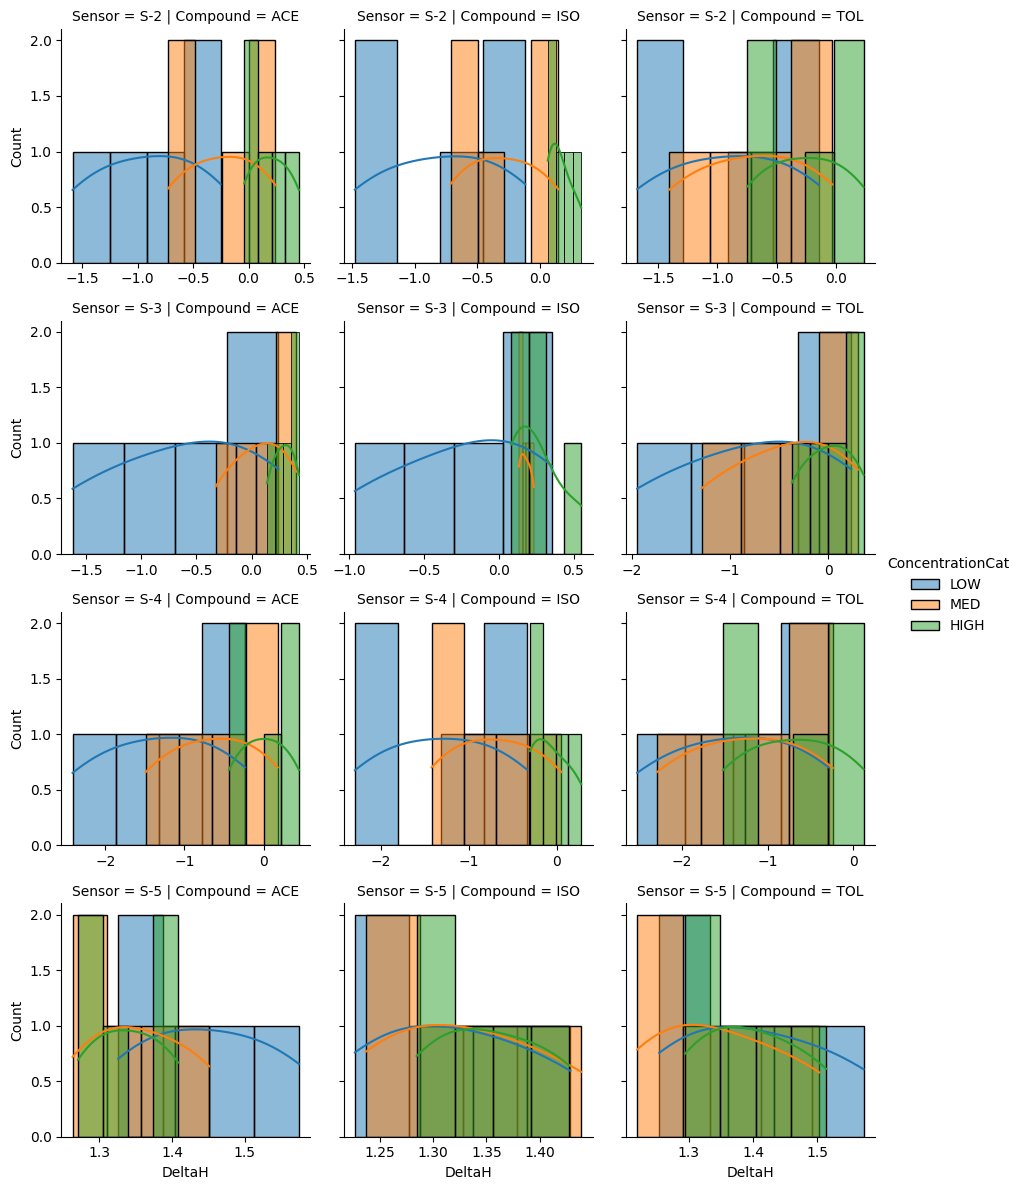

In [41]:
def apply_cat_conc(x):
    if x < 100:
        return "LOW"
    elif x>=100 and x<= 200:
        return "MED"
    else:
        return "HIGH"
    
features["ConcentrationCat"] = features["Concentration"].apply(apply_cat_conc)
features["ConcentrationCat"] = features["ConcentrationCat"].astype(pd.CategoricalDtype(categories=["LOW","MED","HIGH"], ordered=True)) 
fg = sns.FacetGrid(data=features, col="Compound", hue="ConcentrationCat", row="Sensor", sharex=False,)
fg.map(sns.histplot, "DeltaH", kde=True)# kde=True)
fg.add_legend()
#sns.displot(data=features, x="DeltaH", hue="Compound", kde=True)

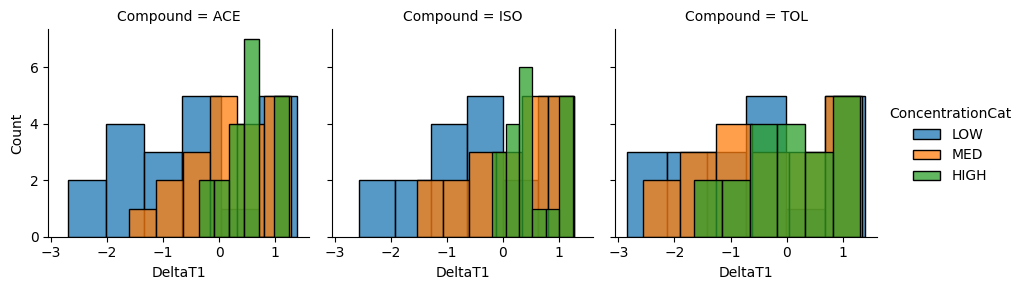

In [42]:
fg = sns.FacetGrid(data=features, col="Compound", hue="ConcentrationCat")
fg.map(sns.histplot, "DeltaT1", )# kde=True)
fg.add_legend()

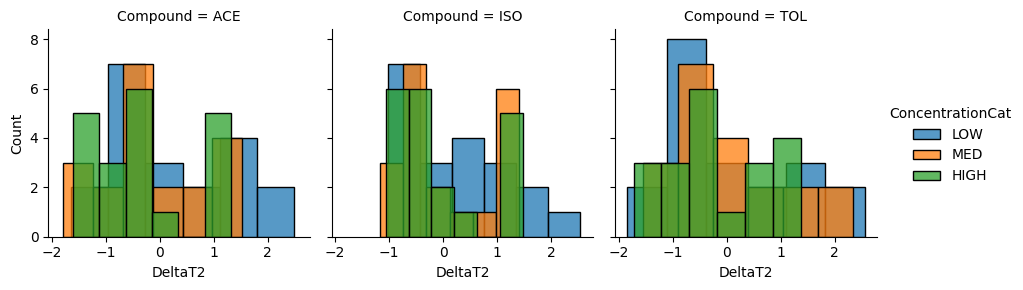

In [43]:
fg = sns.FacetGrid(data=features, col="Compound", hue="ConcentrationCat")
fg.map(sns.histplot, "DeltaT2", )# kde=True)
fg.add_legend()

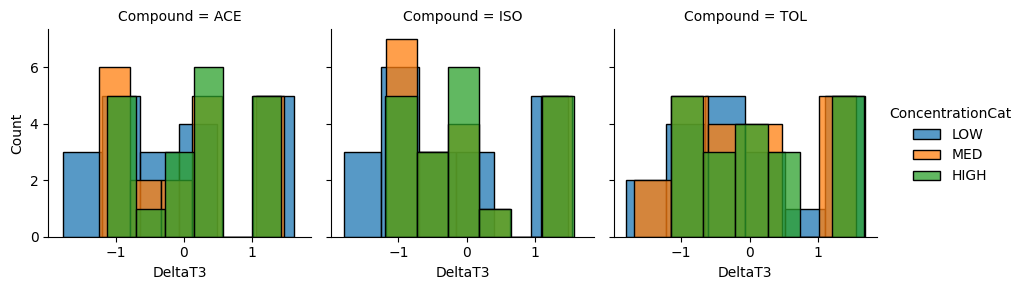

In [44]:
fg = sns.FacetGrid(data=features, col="Compound", hue="ConcentrationCat")
fg.map(sns.histplot, "DeltaT3", )# kde=True)
fg.add_legend()

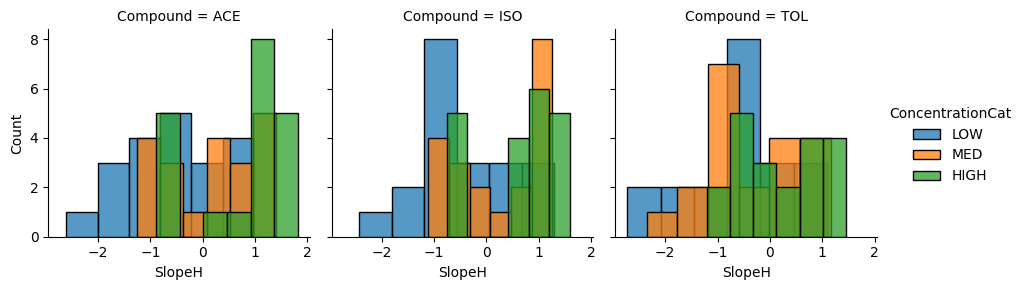

In [45]:
fg = sns.FacetGrid(data=features, col="Compound", hue="ConcentrationCat")
fg.map(sns.histplot, "SlopeH", )# kde=True)
fg.add_legend()

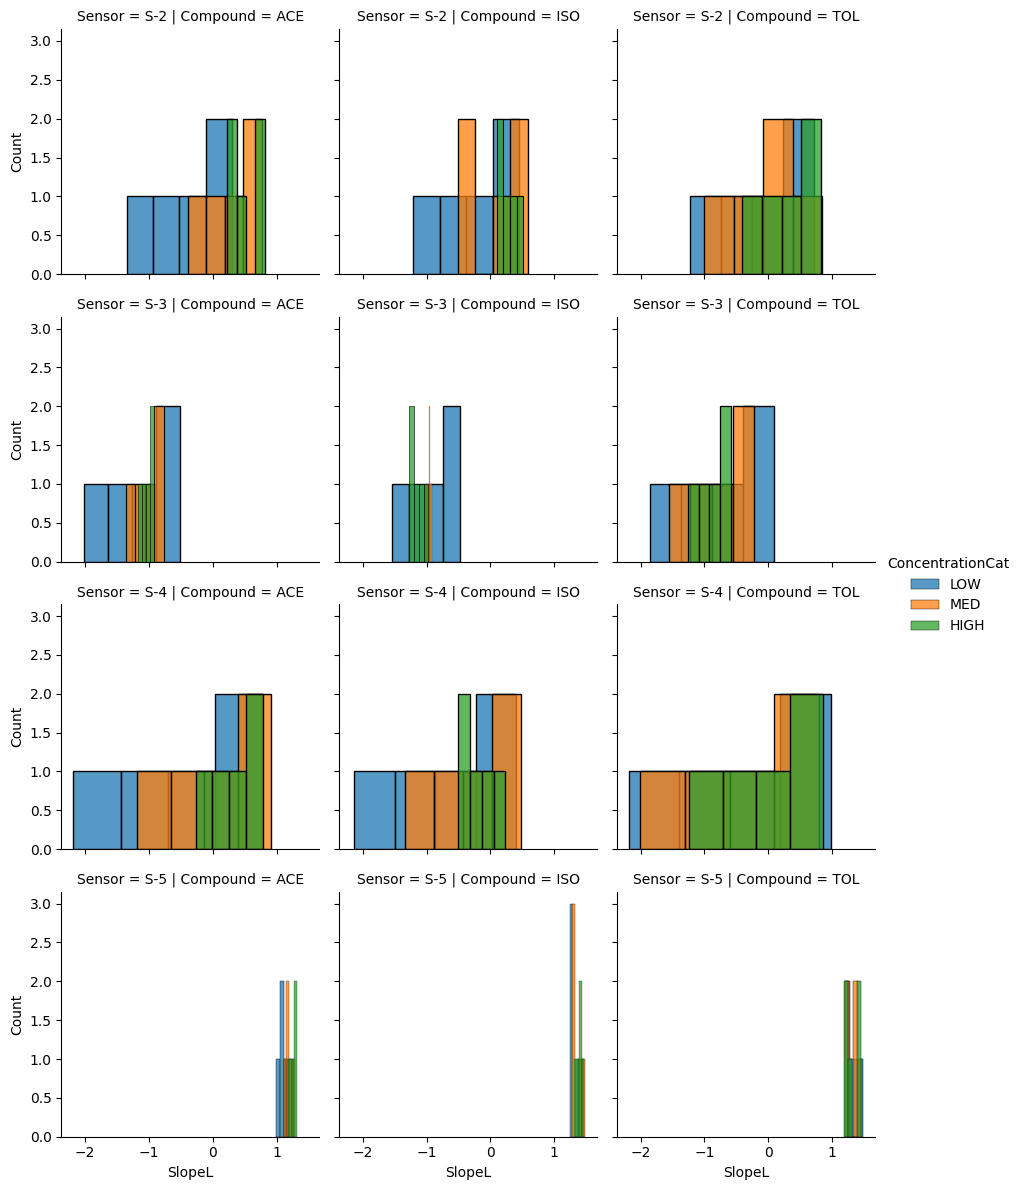

In [46]:
fg = sns.FacetGrid(data=features, col="Compound", hue="ConcentrationCat", row="Sensor")
fg.map(sns.histplot, "SlopeL", )# kde=True)
fg.add_legend()

In [47]:
features.Concentration.unique()

array([173, 319,  73, 163, 335,  78, 159, 298,  83], dtype=int64)